# Lab 07 - Data Wrangling Skills Part II
Two main concepts are covered in this lab: 
1. data enrichment; and
2. feature engineering. 
Some of the skills that you have learned are needed to complete the exercises. 

## 7a.0 Data Enrichment
 In this section, we will use two data sets. One data set is a fake data and another one is the air quality data from UCI (the data set which has be used in lab06 under section Date Time).

1.	Create a fake data with movies title and two users’ profile. The rating with value `1` indicates extremely dislike whereas `10` indicates extremely like.  

In [1]:
import pandas as pd
# create data. In real world, this data may be from database
movies = {'movie_id': [1000, 1001, 1002, 1003],
          'title': ['Toy Story', 'Jumanji', 'Iron Man', 'The Secrets of Dumbledore'],
          'genre': ['Adventure|Animation|Children', 'Adventure|Children|Fantasy', 'Action|Adventure|Sci-Fi', 'Adventure|Fantasy|Family']}

users = {'user_id': [100, 100, 101, 101, 102, 102, 103,103, 103, 104, 104, 105, 
                     106, 106, 106, 107, 107, 108, 108, 109],
         'DOB': [20000221, 20000221, 19901212, 19901212, 19831125, 19831125, 
                 19880920, 19880920, 19880920, 19750614,19750614, 19600522, 19950505, 
                 19950505, 19950505, 19770723, 19770723, 20010101, 20010101, 19990608],
         'movie_id': [1000, 1001, 1000, 1002, 1001,1002, 1000, 1002, 1002, 1001, 1002, 
                      1001, 1000, 1001, 1002, 1001, 1002, 1000, 1001, 1002],
         'timestamp': [20210728, 20210727, 20210726, 20210728, 20210727, 20210726, 20210728, 
                       20210727, 20210726,20210728, 20210727, 20210726, 20210728, 20210727, 20210726,
                       20210728, 20210727, 20210726, 20210727, 20210726],
         'rating': [9,8,7,5,8,7,9,10,5,6,8,8, 9, 8, 6, 8, 7, 8,6,8]}

users1 = {'user_id': [110, 110, 111, 112, 112, 112, 113,113, 113, 114, 114, 115],
         'DOB': [20020202, 20020202, 19901212, 19831130, 19831130, 19831130, 19880905, 
                 19880905, 19880905, 19750610,19750610, 19600512],
         'movie_id': [1000, 1001, 1000, 1002, 1001,1002, 1000, 1002, 1002, 1001, 1002, 1001],
         'timestamp': [20210728, 20210727, 20210726, 20210728, 20210727, 
                       20210726, 20210728, 20210727, 20210726,20210728, 20210727, 20210726],
         'rating': [8,8,9,6,5,8,9,10,8,7,5,8]}


### Exercise 1: Data Frame and Histogram

This exercise is to let you practice your python skill in creating data frame and observe the data through histogram.\
Perform the following:

Ex 1.1 : Now, save both movies, users and users1 into three different data frames named as `Data1`, `Data2` and `Data3` respectively.\
\
Ex 1.2 : Display the first few rows of each data frame. \
\
Ex 1.3 : Explore the feature “rating” by using histogram and set the number of bins = 5. [Hints: the function is ``.hist(bins=X)``]


In [2]:
Data1 = pd.DataFrame(movies)
Data2 = pd.DataFrame(users)
Data3 = pd.DataFrame(users1)

In [3]:
display(Data1.head())
display(Data2.head())
display(Data3.head())

,movie_id,title,genre
0,1000,Toy Story,Adventure|Animation|Children
1,1001,Jumanji,Adventure|Children|Fantasy
2,1002,Iron Man,Action|Adventure|Sci-Fi
3,1003,The Secrets of Dumbledore,Adventure|Fantasy|Family


,user_id,DOB,movie_id,timestamp,rating
0,100,20000221,1000,20210728,9
1,100,20000221,1001,20210727,8
2,101,19901212,1000,20210726,7
3,101,19901212,1002,20210728,5
4,102,19831125,1001,20210727,8


,user_id,DOB,movie_id,timestamp,rating
0,110,20020202,1000,20210728,8
1,110,20020202,1001,20210727,8
2,111,19901212,1000,20210726,9
3,112,19831130,1002,20210728,6
4,112,19831130,1001,20210727,5


<Axes: >

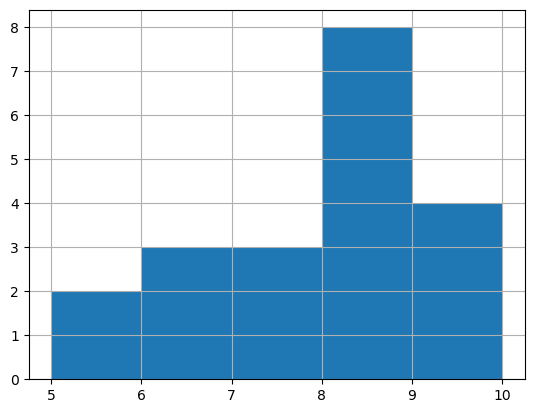

In [4]:
Data2['rating'].hist(bins = 5)

2.	The genre in Data1 is a string, such as “`Advanture|Animation|Children`”. Change each of the word into a list by manipulating the string.

In [5]:
# split the genre column strings at '|' to make lists
Data1.genre = Data1.genre.str.split('|')
display(Data1)

,movie_id,title,genre
0,1000,Toy Story,"[Adventure, Animation, Children]"
1,1001,Jumanji,"[Adventure, Children, Fantasy]"
2,1002,Iron Man,"[Action, Adventure, Sci-Fi]"
3,1003,The Secrets of Dumbledore,"[Adventure, Fantasy, Family]"


3.	Transform the DOB in Data2 and Data3 from string to date.

In [6]:
Data2['DOB'] = Data2['DOB'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
Data3['DOB'] = Data3['DOB'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

### Exercise 2: Adding New Columns

Ex2.1.	Based on the DOB, count the age of each user in Data2 and Data3. [Hints: `to_datetime(‘today’)` will get you the date of today but you need only the year]\

In [7]:
Age2 = pd.to_datetime('today').year-Data2['DOB'].dt.year
Age3 = pd.to_datetime('today').year-Data3['DOB'].dt.year

Ex2.2.	Add the information in Ex2.1 as a new column to Data2 and Data3 respectively. Then, display first few rows of both data

In [8]:
Data2.insert(2, 'Age', Age2) #insert into column 2.
Data3.insert(2, 'Age', Age3)

In [9]:
display(Data2.head())
display(Data3.head())

,user_id,DOB,Age,movie_id,timestamp,rating
0,100,2000-02-21,23,1000,20210728,9
1,100,2000-02-21,23,1001,20210727,8
2,101,1990-12-12,33,1000,20210726,7
3,101,1990-12-12,33,1002,20210728,5
4,102,1983-11-25,40,1001,20210727,8


,user_id,DOB,Age,movie_id,timestamp,rating
0,110,2002-02-02,21,1000,20210728,8
1,110,2002-02-02,21,1001,20210727,8
2,111,1990-12-12,33,1000,20210726,9
3,112,1983-11-30,40,1002,20210728,6
4,112,1983-11-30,40,1001,20210727,5


## 7a.1 Simple Binning

1.	Obtain `minAge` and `maxAge` from `Data2` through column `Age`.

In [10]:
import numpy as np
minAge = Data2['Age'].min()
maxAge = Data2['Age'].max()

2. Set the linspace (linearly spaced values) between `minAge` and `maxAge` to 4 intervals. With 4 intervals, we can set 3 categories. 

In [11]:
bins=np.linspace(minAge,maxAge,4)
labels=['young','middle age','senior']

bins

array([22.        , 35.66666667, 49.33333333, 63.        ])

3.  Use a function called `cut` to have equal width binning. 

In [12]:
Data2['bins'] =pd.cut(Data2['Age'], bins=bins, labels=labels, include_lowest=True)
Data2

,user_id,DOB,Age,movie_id,timestamp,rating,bins
0,100,2000-02-21,23,1000,20210728,9,young
1,100,2000-02-21,23,1001,20210727,8,young
2,101,1990-12-12,33,1000,20210726,7,young
3,101,1990-12-12,33,1002,20210728,5,young
4,102,1983-11-25,40,1001,20210727,8,middle age
5,102,1983-11-25,40,1002,20210726,7,middle age
6,103,1988-09-20,35,1000,20210728,9,young
7,103,1988-09-20,35,1002,20210727,10,young
8,103,1988-09-20,35,1002,20210726,5,young
9,104,1975-06-14,48,1001,20210728,6,middle age


4.	Use `qcut` and observe the equal frequency binning (approximate). Discuss the differences of output after apply `cut` and `qcut`.

In [13]:
Data2['bin_qcut'] = pd.qcut(Data2['Age'], q=3, labels=labels, precision=1) #qcut: quartile cut
display(Data2)

,user_id,DOB,Age,movie_id,timestamp,rating,bins,bin_qcut
0,100,2000-02-21,23,1000,20210728,9,young,young
1,100,2000-02-21,23,1001,20210727,8,young,young
2,101,1990-12-12,33,1000,20210726,7,young,middle age
3,101,1990-12-12,33,1002,20210728,5,young,middle age
4,102,1983-11-25,40,1001,20210727,8,middle age,senior
5,102,1983-11-25,40,1002,20210726,7,middle age,senior
6,103,1988-09-20,35,1000,20210728,9,young,middle age
7,103,1988-09-20,35,1002,20210727,10,young,middle age
8,103,1988-09-20,35,1002,20210726,5,young,middle age
9,104,1975-06-14,48,1001,20210728,6,middle age,senior


## 7a.2 Clustering and Binning
Clustering techniques can be used to split the data and are one of the binning techniques. 

#### A. In this section, we use k-mean.

1. Import `k-mean` from `sklearn`.

In [14]:
from sklearn.cluster import KMeans

2. Create a variable `Data4` to store the `Age` column information in `Data2`.

In [15]:
Data4 = Data2[['Age']]

3.	Set the number of clusters in k-mean to `3` and train on `Data4`.

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Data4)

c:\Users\Fang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Fang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

4.	Add the cluster result from k-mean as an additional columns and name the column as “cluster”. 

In [17]:
Data4.loc[:, 'cluster'] = kmeans.labels_
Data4

C:\Users\Fang\AppData\Local\Temp\ipykernel_10064\3827802083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data4.loc[:, 'cluster'] = kmeans.labels_


,Age,cluster
0,23,2
1,23,2
2,33,0
3,33,0
4,40,0
5,40,0
6,35,0
7,35,0
8,35,0
9,48,1


5.	Name the labels by setting 0 as Young, 1 as Middle Age and 2 as Senior.

In [18]:
labels = {0: "Young", 1: "Middle Age", 2: "Senior"}

6.	Apply the labels to `Data4['cluster']` and add it into Data2 as "`class_kmeans`"

In [19]:
Data2["class_kmeans"] = Data4["cluster"].apply(lambda x: labels[x])

7.	Compare all the other binning results and observe the differences.

In [20]:
print(Data2)

    user_id        DOB  Age  movie_id  timestamp  rating        bins  \
0       100 2000-02-21   23      1000   20210728       9       young   
1       100 2000-02-21   23      1001   20210727       8       young   
2       101 1990-12-12   33      1000   20210726       7       young   
3       101 1990-12-12   33      1002   20210728       5       young   
4       102 1983-11-25   40      1001   20210727       8  middle age   
5       102 1983-11-25   40      1002   20210726       7  middle age   
6       103 1988-09-20   35      1000   20210728       9       young   
7       103 1988-09-20   35      1002   20210727      10       young   
8       103 1988-09-20   35      1002   20210726       5       young   
9       104 1975-06-14   48      1001   20210728       6  middle age   
10      104 1975-06-14   48      1002   20210727       8  middle age   
11      105 1960-05-22   63      1001   20210726       8      senior   
12      106 1995-05-05   28      1000   20210728       9       y

#### B.	Another simple clustering technique is Fisher-Jenks algorithm (natural break). 
The example is demonstrated here. 

1.	Install jenkspy if you have not done so (Batch file/ or via Anaconda Command Prompt)

`pip install jenkspy`

2.	Import the module and set the break of classes to 3.

In [21]:
import jenkspy
Breaks_nature = jenkspy.jenks_breaks(Data2['Age'], n_classes=3)

3.	Use function `cut` to break the data according to the break information in `Breaks_nature` and store the information in a new column `bincut_break`. Show the data of this new column by using histogram.

<Axes: >

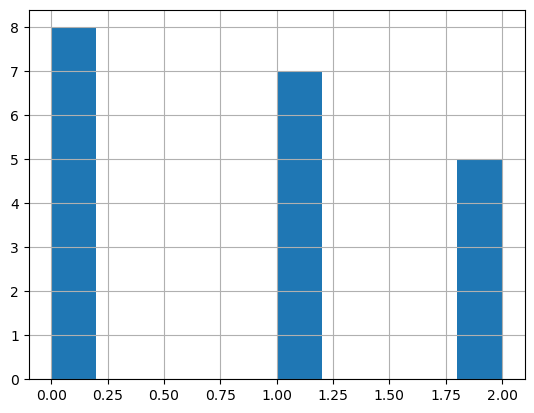

In [22]:
Data2['bincut_break'] = pd.cut(Data2['Age'], bins=Breaks_nature, labels=labels, include_lowest=True)
Data2['bincut_break'].hist()

4.	Display `Data2`. 

In [23]:
display(Data2)

,user_id,DOB,Age,movie_id,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break
0,100,2000-02-21,23,1000,20210728,9,young,young,Senior,0
1,100,2000-02-21,23,1001,20210727,8,young,young,Senior,0
2,101,1990-12-12,33,1000,20210726,7,young,middle age,Young,1
3,101,1990-12-12,33,1002,20210728,5,young,middle age,Young,1
4,102,1983-11-25,40,1001,20210727,8,middle age,senior,Young,1
5,102,1983-11-25,40,1002,20210726,7,middle age,senior,Young,1
6,103,1988-09-20,35,1000,20210728,9,young,middle age,Young,1
7,103,1988-09-20,35,1002,20210727,10,young,middle age,Young,1
8,103,1988-09-20,35,1002,20210726,5,young,middle age,Young,1
9,104,1975-06-14,48,1001,20210728,6,middle age,senior,Middle Age,2


## 7a.3 Concatenate, Merging and Joining

We can join data frames together to check the intersection/overlapping records between two data sets or combine related information together into one data frame and form a larger data set.

1.	Apply a simple concatenate function to combine Data1 and Data2 by columns. Print screen your result and paste in a word document. 

In [24]:
display(Data1.head())
display(Data2.head())

con1 = pd.concat([Data1, Data2], axis=1)
display(con1)

,movie_id,title,genre
0,1000,Toy Story,"[Adventure, Animation, Children]"
1,1001,Jumanji,"[Adventure, Children, Fantasy]"
2,1002,Iron Man,"[Action, Adventure, Sci-Fi]"
3,1003,The Secrets of Dumbledore,"[Adventure, Fantasy, Family]"


,user_id,DOB,Age,movie_id,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break
0,100,2000-02-21,23,1000,20210728,9,young,young,Senior,0
1,100,2000-02-21,23,1001,20210727,8,young,young,Senior,0
2,101,1990-12-12,33,1000,20210726,7,young,middle age,Young,1
3,101,1990-12-12,33,1002,20210728,5,young,middle age,Young,1
4,102,1983-11-25,40,1001,20210727,8,middle age,senior,Young,1


,movie_id,title,genre,user_id,DOB,Age,movie_id,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break
0,1000.0,Toy Story,"[Adventure, Animation, Children]",100,2000-02-21,23,1000,20210728,9,young,young,Senior,0
1,1001.0,Jumanji,"[Adventure, Children, Fantasy]",100,2000-02-21,23,1001,20210727,8,young,young,Senior,0
2,1002.0,Iron Man,"[Action, Adventure, Sci-Fi]",101,1990-12-12,33,1000,20210726,7,young,middle age,Young,1
3,1003.0,The Secrets of Dumbledore,"[Adventure, Fantasy, Family]",101,1990-12-12,33,1002,20210728,5,young,middle age,Young,1
4,NaN,NaN,NaN,102,1983-11-25,40,1001,20210727,8,middle age,senior,Young,1
5,NaN,NaN,NaN,102,1983-11-25,40,1002,20210726,7,middle age,senior,Young,1
6,NaN,NaN,NaN,103,1988-09-20,35,1000,20210728,9,young,middle age,Young,1
7,NaN,NaN,NaN,103,1988-09-20,35,1002,20210727,10,young,middle age,Young,1
8,NaN,NaN,NaN,103,1988-09-20,35,1002,20210726,5,young,middle age,Young,1
9,NaN,NaN,NaN,104,1975-06-14,48,1001,20210728,6,middle age,senior,Middle Age,2


2.	Add in the parameter `join='inner'`. Observe the difference between the output with join and the output in No. 1. 

In [25]:
con1 = pd.concat([Data1, Data2], axis=1, join='inner')
display(con1)

,movie_id,title,genre,user_id,DOB,Age,movie_id,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break
0,1000,Toy Story,"[Adventure, Animation, Children]",100,2000-02-21,23,1000,20210728,9,young,young,Senior,0
1,1001,Jumanji,"[Adventure, Children, Fantasy]",100,2000-02-21,23,1001,20210727,8,young,young,Senior,0
2,1002,Iron Man,"[Action, Adventure, Sci-Fi]",101,1990-12-12,33,1000,20210726,7,young,middle age,Young,1
3,1003,The Secrets of Dumbledore,"[Adventure, Fantasy, Family]",101,1990-12-12,33,1002,20210728,5,young,middle age,Young,1


3.	The following command is applying merge to combine Data1 and Data2. 

In [26]:
outer_Merge = pd.merge(Data1, Data2, how="outer", on='movie_id', suffixes=("_x","_y"))
display(outer_Merge)

,movie_id,title,genre,user_id,DOB,Age,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break
0,1000,Toy Story,"[Adventure, Animation, Children]",100.0,2000-02-21,23.0,20210728.0,9.0,young,young,Senior,0
1,1000,Toy Story,"[Adventure, Animation, Children]",101.0,1990-12-12,33.0,20210726.0,7.0,young,middle age,Young,1
2,1000,Toy Story,"[Adventure, Animation, Children]",103.0,1988-09-20,35.0,20210728.0,9.0,young,middle age,Young,1
3,1000,Toy Story,"[Adventure, Animation, Children]",106.0,1995-05-05,28.0,20210728.0,9.0,young,young,Senior,0
4,1000,Toy Story,"[Adventure, Animation, Children]",108.0,2001-01-01,22.0,20210726.0,8.0,young,young,Senior,0
5,1001,Jumanji,"[Adventure, Children, Fantasy]",100.0,2000-02-21,23.0,20210727.0,8.0,young,young,Senior,0
6,1001,Jumanji,"[Adventure, Children, Fantasy]",102.0,1983-11-25,40.0,20210727.0,8.0,middle age,senior,Young,1
7,1001,Jumanji,"[Adventure, Children, Fantasy]",104.0,1975-06-14,48.0,20210728.0,6.0,middle age,senior,Middle Age,2
8,1001,Jumanji,"[Adventure, Children, Fantasy]",105.0,1960-05-22,63.0,20210726.0,8.0,senior,senior,Middle Age,2
9,1001,Jumanji,"[Adventure, Children, Fantasy]",106.0,1995-05-05,28.0,20210727.0,8.0,young,young,Senior,0


4.	Use join. Print screen the result. 

5.	Observe and dicuss the differences in the result if any.

### Exercise 3: Combining the Data

Ex3.1.	Concatenate Data1 and Data2 by rows.

In [27]:
con1 = pd.concat([Data1, Data2], axis=0)
display(con1)

,movie_id,title,genre,user_id,DOB,Age,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break
0,1000,Toy Story,"[Adventure, Animation, Children]",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,Jumanji,"[Adventure, Children, Fantasy]",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,Iron Man,"[Action, Adventure, Sci-Fi]",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,The Secrets of Dumbledore,"[Adventure, Fantasy, Family]",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000,NaN,NaN,100.0,2000-02-21,23.0,20210728.0,9.0,young,young,Senior,0
1,1001,NaN,NaN,100.0,2000-02-21,23.0,20210727.0,8.0,young,young,Senior,0
2,1000,NaN,NaN,101.0,1990-12-12,33.0,20210726.0,7.0,young,middle age,Young,1
3,1002,NaN,NaN,101.0,1990-12-12,33.0,20210728.0,5.0,young,middle age,Young,1
4,1001,NaN,NaN,102.0,1983-11-25,40.0,20210727.0,8.0,middle age,senior,Young,1
5,1002,NaN,NaN,102.0,1983-11-25,40.0,20210726.0,7.0,middle age,senior,Young,1


Ex3.2.	Concatenate Data2 and Data3 by columns.

In [28]:
con1 = pd.concat([Data2, Data3], axis=1)
display(con1)

,user_id,DOB,Age,movie_id,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break,user_id,DOB,Age,movie_id,timestamp,rating
0,100,2000-02-21,23,1000,20210728,9,young,young,Senior,0,110.0,2002-02-02,21.0,1000.0,20210728.0,8.0
1,100,2000-02-21,23,1001,20210727,8,young,young,Senior,0,110.0,2002-02-02,21.0,1001.0,20210727.0,8.0
2,101,1990-12-12,33,1000,20210726,7,young,middle age,Young,1,111.0,1990-12-12,33.0,1000.0,20210726.0,9.0
3,101,1990-12-12,33,1002,20210728,5,young,middle age,Young,1,112.0,1983-11-30,40.0,1002.0,20210728.0,6.0
4,102,1983-11-25,40,1001,20210727,8,middle age,senior,Young,1,112.0,1983-11-30,40.0,1001.0,20210727.0,5.0
5,102,1983-11-25,40,1002,20210726,7,middle age,senior,Young,1,112.0,1983-11-30,40.0,1002.0,20210726.0,8.0
6,103,1988-09-20,35,1000,20210728,9,young,middle age,Young,1,113.0,1988-09-05,35.0,1000.0,20210728.0,9.0
7,103,1988-09-20,35,1002,20210727,10,young,middle age,Young,1,113.0,1988-09-05,35.0,1002.0,20210727.0,10.0
8,103,1988-09-20,35,1002,20210726,5,young,middle age,Young,1,113.0,1988-09-05,35.0,1002.0,20210726.0,8.0
9,104,1975-06-14,48,1001,20210728,6,middle age,senior,Middle Age,2,114.0,1975-06-10,48.0,1001.0,20210728.0,7.0


Ex3.3.	Concatenate Data2 and Data3 by rows.

In [29]:
con1 = pd.concat([Data2, Data3], axis=0)
display(con1)

,user_id,DOB,Age,movie_id,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break
0,100,2000-02-21,23,1000,20210728,9,young,young,Senior,0
1,100,2000-02-21,23,1001,20210727,8,young,young,Senior,0
2,101,1990-12-12,33,1000,20210726,7,young,middle age,Young,1
3,101,1990-12-12,33,1002,20210728,5,young,middle age,Young,1
4,102,1983-11-25,40,1001,20210727,8,middle age,senior,Young,1
5,102,1983-11-25,40,1002,20210726,7,middle age,senior,Young,1
6,103,1988-09-20,35,1000,20210728,9,young,middle age,Young,1
7,103,1988-09-20,35,1002,20210727,10,young,middle age,Young,1
8,103,1988-09-20,35,1002,20210726,5,young,middle age,Young,1
9,104,1975-06-14,48,1001,20210728,6,middle age,senior,Middle Age,2


Ex3.4.	Use join, and change the parameter of how to right, outer and inner.

Ex3.5.	Observe and discuss the differences among the concatenate results and the join results.

In [30]:
#left join
result1 = Data1.set_index('movie_id').join(Data2.set_index('movie_id'), how = 'left')
display(result1)

#right join
result1 = Data1.set_index('movie_id').join(Data2.set_index('movie_id'), how = 'right')
display(result1)

,title,genre,user_id,DOB,Age,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break
movie_id,,,,,,,,,,,
1000,Toy Story,"[Adventure, Animation, Children]",100.0,2000-02-21,23.0,20210728.0,9.0,young,young,Senior,0
1000,Toy Story,"[Adventure, Animation, Children]",101.0,1990-12-12,33.0,20210726.0,7.0,young,middle age,Young,1
1000,Toy Story,"[Adventure, Animation, Children]",103.0,1988-09-20,35.0,20210728.0,9.0,young,middle age,Young,1
1000,Toy Story,"[Adventure, Animation, Children]",106.0,1995-05-05,28.0,20210728.0,9.0,young,young,Senior,0
1000,Toy Story,"[Adventure, Animation, Children]",108.0,2001-01-01,22.0,20210726.0,8.0,young,young,Senior,0
1001,Jumanji,"[Adventure, Children, Fantasy]",100.0,2000-02-21,23.0,20210727.0,8.0,young,young,Senior,0
1001,Jumanji,"[Adventure, Children, Fantasy]",102.0,1983-11-25,40.0,20210727.0,8.0,middle age,senior,Young,1
1001,Jumanji,"[Adventure, Children, Fantasy]",104.0,1975-06-14,48.0,20210728.0,6.0,middle age,senior,Middle Age,2
1001,Jumanji,"[Adventure, Children, Fantasy]",105.0,1960-05-22,63.0,20210726.0,8.0,senior,senior,Middle Age,2


,title,genre,user_id,DOB,Age,timestamp,rating,bins,bin_qcut,class_kmeans,bincut_break
movie_id,,,,,,,,,,,
1000,Toy Story,"[Adventure, Animation, Children]",100,2000-02-21,23,20210728,9,young,young,Senior,0
1000,Toy Story,"[Adventure, Animation, Children]",101,1990-12-12,33,20210726,7,young,middle age,Young,1
1000,Toy Story,"[Adventure, Animation, Children]",103,1988-09-20,35,20210728,9,young,middle age,Young,1
1000,Toy Story,"[Adventure, Animation, Children]",106,1995-05-05,28,20210728,9,young,young,Senior,0
1000,Toy Story,"[Adventure, Animation, Children]",108,2001-01-01,22,20210726,8,young,young,Senior,0
1001,Jumanji,"[Adventure, Children, Fantasy]",100,2000-02-21,23,20210727,8,young,young,Senior,0
1001,Jumanji,"[Adventure, Children, Fantasy]",102,1983-11-25,40,20210727,8,middle age,senior,Young,1
1001,Jumanji,"[Adventure, Children, Fantasy]",104,1975-06-14,48,20210728,6,middle age,senior,Middle Age,2
1001,Jumanji,"[Adventure, Children, Fantasy]",105,1960-05-22,63,20210726,8,senior,senior,Middle Age,2


## 7a.4 Summarizing/Aggregating

Syntax: `DF.groupby('MERGE_COL').AGG({'CALC_COL': ['min|max|count|mean']})`

Summary and aggregation function in Pandas are useful in producing meaningful results. \
Here are some examples:
1.	To see the minimum and maximum rating per user and group according to age group \
(based on the result from function cut in `bins`).


In [31]:
Data2.groupby('user_id').agg({'rating':['min','max']})
Data2.groupby('bins').agg({'rating':['min','max']})

rating    
              min max
bins                 
young           5  10
middle age      6   8
senior          8   8

### Exercise 4: Groupby

Ex4.1.	Check the min and max rating per age group based on the result from qcut (`bin_qcut`).

Ex4.2.	Check the min and max rating per age group based on the result from k-means (`class_kmeans`).

Ex4.3.	Display the average rating of each movie.

Ex4.4.	Display the min and max age of user for each movie.

Ex4.5.	Count the number of users for each movie.


In [32]:
display(Data2.groupby('bin_qcut').agg({'rating':['min', 'max']}))
display(Data2.groupby('class_kmeans').agg({'rating':['min', 'max']}))
display(Data2.groupby('movie_id').agg({'rating':['mean']}))
display(Data2.groupby('movie_id').agg({'Age':['min', 'max']}))
display(Data2.groupby('movie_id').agg({'user_id':['count']}))

rating    
              min max
bin_qcut             
young           6   9
middle age      5  10
senior          6   8

rating    
                min max
class_kmeans           
Middle Age        6   8
Senior            6   9
Young             5  10

,rating
,mean
movie_id,
1000,8.400000
1001,7.428571
1002,7.000000


Age    
         min max
movie_id        
1000      22  35
1001      22  63
1002      24  48

,user_id
,count
movie_id,
1000,5
1001,7
1002,8


## 7a.5 Resampling

In this section, the air quality data is used. You can reuse the command where we have converted date time into the proper data type.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Datasets/AirQualityUCI.csv", header=[0], sep=";")
#this portion handle the missing data
threshold=data.isnull().sum()/ len(data) 
remove_col = threshold[threshold>0.8].index #get the index of each columns and store in remove_col
data.drop(remove_col, axis=1, inplace = True)
threshold = data.isnull().sum(axis=1)/(len(data.columns)-1)
remove_row = threshold[threshold>0.8].index
data.drop(remove_row, axis=0, inplace = True)

print(data.head()) #check to make sure it moves only those with missing values >80%
print(len(data))
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format = '%H.%M.%S').dt.time

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,786

C:\Users\Fang\AppData\Local\Temp\ipykernel_10064\1334301085.py:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


The features of this data are as below:

0. Date (DD/MM/YYYY) 
1. Time (HH.MM.SS) 
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 
7. True hourly averaged NOx concentration in ppb (reference analyzer) 
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
12. Temperature in Â°C 
13. Relative Humidity (%) 
14. AH Absolute Humidity

1.	Set the date as index and display the first few rows of the data. 

In [34]:
data1=data.set_index(pd.DatetimeIndex(data['Date'])).drop("Date", axis=1)
data1.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-10-03,18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
2004-10-03,19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2004-10-03,20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
2004-10-03,21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
2004-10-03,22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


2.	Resample the data by producing average value by week. This is called downsample.

In [35]:
data1.resample("W").mean().ffill()

C:\Users\Fang\AppData\Local\Temp\ipykernel_10064\1634165961.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1.resample("W").mean().ffill()


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
Date,,,,,,,,
2004-01-04,1063.833333,310.125000,859.125000,146.250000,745.583333,84.375000,1413.833333,986.375000
2004-01-11,1127.779762,-197.172619,1001.285714,161.422619,755.696429,65.892857,1716.107143,1074.357143
2004-01-18,1173.375000,-200.000000,1050.458333,490.958333,1490.333333,113.750000,1448.541667,1196.333333
2004-01-25,1173.375000,-200.000000,1050.458333,490.958333,1490.333333,113.750000,1448.541667,1196.333333
2004-02-01,1173.375000,-200.000000,1050.458333,490.958333,1490.333333,113.750000,1448.541667,1196.333333
...,...,...,...,...,...,...,...,...
2005-11-06,807.333333,-200.000000,648.166667,453.319444,372.041667,160.861111,858.666667,877.013889
2005-11-13,807.333333,-200.000000,648.166667,453.319444,372.041667,160.861111,858.666667,877.013889
2005-11-20,807.333333,-200.000000,648.166667,453.319444,372.041667,160.861111,858.666667,877.013889


3.	Produce the min and max value by week. Note that there are some values are `NaN`.

In [36]:
data1.resample("W").agg(['min','max'])

Time            CO(GT)      PT08.S1(CO)         NMHC(GT)  \
                 min       max     min  max         min     max      min   
Date                                                                       
2004-01-04  00:00:00  23:00:00     0,7  6,2      -200.0  1722.0     44.0   
2004-01-11  00:00:00  23:00:00    -200  5,6      -200.0  1707.0   -200.0   
2004-01-18  00:00:00  23:00:00    -200  7,5       844.0  1566.0   -200.0   
2004-01-25       NaN       NaN     NaN  NaN         NaN     NaN      NaN   
2004-02-01       NaN       NaN     NaN  NaN         NaN     NaN      NaN   
...              ...       ...     ...  ...         ...     ...      ...   
2005-11-06  00:00:00  23:00:00  -200,0  7,1      -200.0  1526.0   -200.0   
2005-11-13       NaN       NaN     NaN  NaN         NaN     NaN      NaN   
2005-11-20       NaN       NaN     NaN  NaN         NaN     NaN      NaN   
2005-11-27       NaN       NaN     NaN  NaN         NaN     NaN      NaN   
2005-12-04  00:00:00  23:00:00    -200  5,9       972.0  1846.0   -200.0   

                   C6H6(GT)       ... PT08.S4(NO2)         PT08.S5(O3)  \
               max      min  max  ...          min     max         min   
Date                              ...                                    
2004-01-04  1042.0   -200,0  9,9  ...       -200.0  2439.0      -200.0   
2004-01-11   275.0   -200,0  9,9  ...       -200.0  2555.0      -200.0   
2004-01-18  -200.0     10,1  7,5  ...       1064.0  1972.0       709.0   
2004-01-25     NaN      NaN  NaN  ...          NaN     NaN         NaN   
2004-02-01     NaN      NaN  NaN  ...          NaN     NaN         NaN   
...            ...      ...  ...  ...          ...     ...         ...   
2005-11-06  -200.0   -200,0  9,3  ...       -200.0  1855.0      -200.0   
2005-11-13     NaN      NaN  NaN  ...          NaN     NaN         NaN   
2005-11-20     NaN      NaN  NaN  ...          NaN     NaN         NaN   
2005-11-27     NaN      NaN  NaN  ...          NaN     NaN         NaN   
2005-12-04  -200.0      1,5  9,7  ...       1027.0  1902.0       443.0   

                       T          RH            AH          
               max   min   max   min   max     min     max  
Date                                                        
2004-01-04  1798.0  -200   9,6  -200  73,1    -200  0,8892  
2004-01-11  2519.0  -200  40,2  -200  82,3    -200  1,9998  
2004-01-18  1791.0  10,1   9,8  63,6  84,3  0,8861  1,1342  
2004-01-25     NaN   NaN   NaN   NaN   NaN     NaN     NaN  
2004-02-01     NaN   NaN   NaN   NaN   NaN     NaN     NaN  
...            ...   ...   ...   ...   ...     ...     ...  
2005-11-06  2141.0  -200   8,5  -200  71,9    -200  1,0087  
2005-11-13     NaN   NaN   NaN   NaN   NaN     NaN     NaN  
2005-11-20     NaN   NaN   NaN   NaN   NaN     NaN     NaN  
2005-11-27     NaN   NaN   NaN   NaN   NaN     NaN     NaN  
2005-12-04  2494.0  10,0   9,9  34,1  79,4  0,5735  0,9467  

[101 rows x 28 columns]

4.	Upsampling: Produce the average value by 30 minutes and forward fill the values

In [37]:
data1.resample("30min").mean().ffill()

C:\Users\Fang\AppData\Local\Temp\ipykernel_10064\3291863709.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1.resample("30min").mean().ffill()


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
Date,,,,,,,,
2004-01-04 00:00:00,1063.833333,310.125,859.125000,146.250000,745.583333,84.375000,1413.833333,986.375
2004-01-04 00:30:00,1063.833333,310.125,859.125000,146.250000,745.583333,84.375000,1413.833333,986.375
2004-01-04 01:00:00,1063.833333,310.125,859.125000,146.250000,745.583333,84.375000,1413.833333,986.375
2004-01-04 01:30:00,1063.833333,310.125,859.125000,146.250000,745.583333,84.375000,1413.833333,986.375
2004-01-04 02:00:00,1063.833333,310.125,859.125000,146.250000,745.583333,84.375000,1413.833333,986.375
...,...,...,...,...,...,...,...,...
2005-12-02 22:00:00,1480.875000,-200.000,1138.166667,550.666667,516.250000,198.166667,1368.875000,1899.125
2005-12-02 22:30:00,1480.875000,-200.000,1138.166667,550.666667,516.250000,198.166667,1368.875000,1899.125
2005-12-02 23:00:00,1480.875000,-200.000,1138.166667,550.666667,516.250000,198.166667,1368.875000,1899.125


## 7b: Feature Selection

In this section, use the data from https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

Here is the information about the data:\
The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. The real estate valuation is a regression problem. The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).

Attribute Information:

The inputs are as follows:\
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) \
X2=the house age (unit: year) \
X3=the distance to the nearest MRT station (unit: meter) \
X4=the number of convenience stores in the living circle on foot (integer) \
X5=the geographic coordinate, latitude. (unit: degree) \
X6=the geographic coordinate, longitude. (unit: degree) \
The output is as follow: \
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)


## 7b.1: Correlation and heatmap

1.	Import all the modules and data

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)
data = pd.read_excel('Datasets/Real estate valuation data set.xlsx')
print(data.head())

   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

2.	Drop the first columns which contains only numbers.

In [39]:
data = data.iloc[:,1:8]
print(data.head())

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0          2012.916667          32.0                                84.87882   
1          2012.916667          19.5                               306.59470   
2          2013.583333          13.3                               561.98450   
3          2013.500000          13.3                               561.98450   
4          2012.833333           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


3.	Produce correlation matrix

In [40]:
cor = data.corr()
cor

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


4.	Produce the heat map. \
Based on 3 and 4,\
a.	Identify the positive and negative correlated variables. \
b.	Identify variables that have very low correlation.


<Axes: >

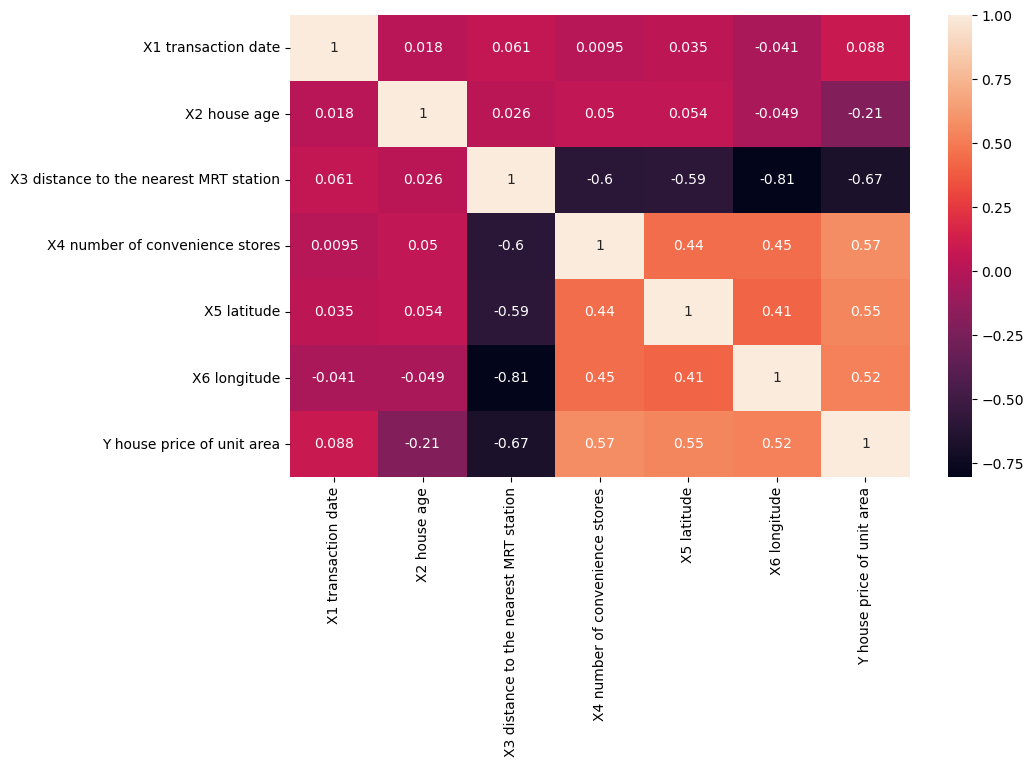

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)

5.	The dependent variable is Y, thus we only interest to know which variables are meaningful to determine Y. Let us set the correlation threshold as 0.5. When the features are having correlation +-0.5 and above, then the features are selected.  

In [42]:
threshold = 0.5
s = abs(cor['Y house price of unit area'])
selectedFeature = s[s>0.5]
print(selectedFeature)

X3 distance to the nearest MRT station    0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64


## 7b.2 Variance Inflation Factor (VIF)

1.	Import VIF

In [43]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

2.	Declare x (independent variables) and y (dependent variable)

In [44]:
x = data.iloc[:, 0:6] #0 to 5, need to set as 0:6
y = data.iloc[:, 6]
print(x.head())
print(y.head())

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0          2012.916667          32.0                                84.87882   
1          2012.916667          19.5                               306.59470   
2          2013.583333          13.3                               561.98450   
3          2013.500000          13.3                               561.98450   
4          2012.833333           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  
0                               10     24.98298     121.54024  
1                                9     24.98034     121.53951  
2                                5     24.98746     121.54391  
3                                5     24.98746     121.54391  
4                                5     24.97937     121.54245  
0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64


3.	Run VIF directly and observe the result.

In [45]:
vif=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

[42526720.52504183, 3.4713921875042315, 4.260901945361337, 4.74809811509895, 6178185.230248435, 41982923.74890924]


4.	Then, try to run multiple regression and generate the VIF. Now, observe the result.\
<u>Which features should be selected?</u>

In [46]:
#run regression and generate VIF
Reg = sm.OLS(y, x).fit() #OLS = ordinary linear squares regression model
pd.DataFrame({'variables': x.columns[0:6], 'VIF':[variance_inflation_factor(x.values, i) for i in range(len(x.columns[0:6]))]})

#Feature 1, 2, 3, 4 and 6. 5 considers too high compare to the other features.

,variables,VIF
0,X1 transaction date,4.252672e+07
1,X2 house age,3.471392e+00
2,X3 distance to the nearest MRT station,4.260902e+00
3,X4 number of convenience stores,4.748098e+00
4,X5 latitude,6.178185e+06
5,X6 longitude,4.198292e+07


## 7b.3 Wrapper Method – Forward Selection

1.	Import mlxtend library. \
(mlxtend = machine learning extension, this library contains a lot of interesting tools for machine learning tasks and data analysis.)

`conda install -c conda-forge mlxtend`

2.	Import modules

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

3.	Build linear regression model to use in feature selection

In [48]:
LR = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

4.	Build step forward feature selection

In [49]:
step_forward = sfs(LR, k_features = 4, forward = True, floating = False, scoring = 'r2', verbose = 2, cv = 5)

5.	Perform step forward feature selection

In [50]:
step_forward = step_forward.fit(X_train, Y_train)
print(list(step_forward.k_feature_idx_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished

[2023-09-05 16:52:51] Features: 1/4 -- score: 0.45414175092884435[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2023-09-05 16:52:52] Features: 2/4 -- score: 0.49504985203785357[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2023-09-05 16:52:52] Features: 3/4 -- score: 0.5324344108793688[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[1, 2, 3, 4]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-09-05 16:52:52] Features: 4/4 -- score: 0.5528676892222919

6.	In this command, we use random forest to select useful features. Which features are selected?

In [51]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector 

feature_selector = SequentialFeatureSelector(RandomForestRegressor(n_jobs=-1), k_features=4, forward=True,verbose=2, scoring='roc_auc', cv=5)
features=feature_selector.fit(X_train, Y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.3s finished

[2023-09-05 16:53:05] Features: 1/4 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished

[2023-09-05 16:53:11] Features: 2/4 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.2s finished

[2023-09-05 16:53:15] Features: 3/4 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0

In [52]:
print(list(features.k_feature_idx_))

[0]


## 7b.4 Wrapper Method – Backward Elimination

1.	Use linear regression to perform backward elimination. <u>Which features are selected?</u>

In [53]:
cols = list(x.columns) #get the columns
while (len(cols) > 0):  #when there are columns available in cols
    p = []
    x_1 = x[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y,x_1).fit() 
    #sm is an object of stat models, and we use OLS froms statmodels library
    p = pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    features_with_p_max=p.idxmax()
    if(pmax > 0.05):  #p is the null hypothesis p value, if greater than 0.05, remove feature
        cols.remove(features_with_p_max)
    else:
        break
summary = model.summary()
print(summary)
selected_features=cols
print(selected_features)

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.577
Method:                         Least Squares   F-statistic:                     113.8
Date:                        Tue, 05 Sep 2023   Prob (F-statistic):           4.44e-75
Time:                                16:53:18   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2986.
Df Residuals:                             408   BIC:                             3010.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

## 7b.5 Embedded Method

1.	Use random forest to perform backward elimination. <u>Which features are selected?</u>

In [54]:
feature_selector = SequentialFeatureSelector(RandomForestRegressor(n_jobs=-1), k_features=4, forward=False,verbose=2, scoring='accuracy', cv=5)
features=feature_selector.fit(np.array(X_train.fillna(0)), Y_train)
print(list(features.k_feature_idx_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.6s finished

[2023-09-05 16:53:28] Features: 5/4 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[0, 1, 2, 3, 4, 5]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.0s finished

[2023-09-05 16:53:34] Features: 4/4 -- score: nan

2.	Use Lasso Regression method. <u>Which features are selected?</u>

Best alpha using built-in LassoCV: 11.539930
Best score using built-in LassoCV: 0.485576
X1 transaction date                       0.000000
X2 house age                             -0.141860
X3 distance to the nearest MRT station   -0.007222
X4 number of convenience stores           0.000000
X5 latitude                               0.000000
X6 longitude                             -0.000000
dtype: float64
Lasso picked 2 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

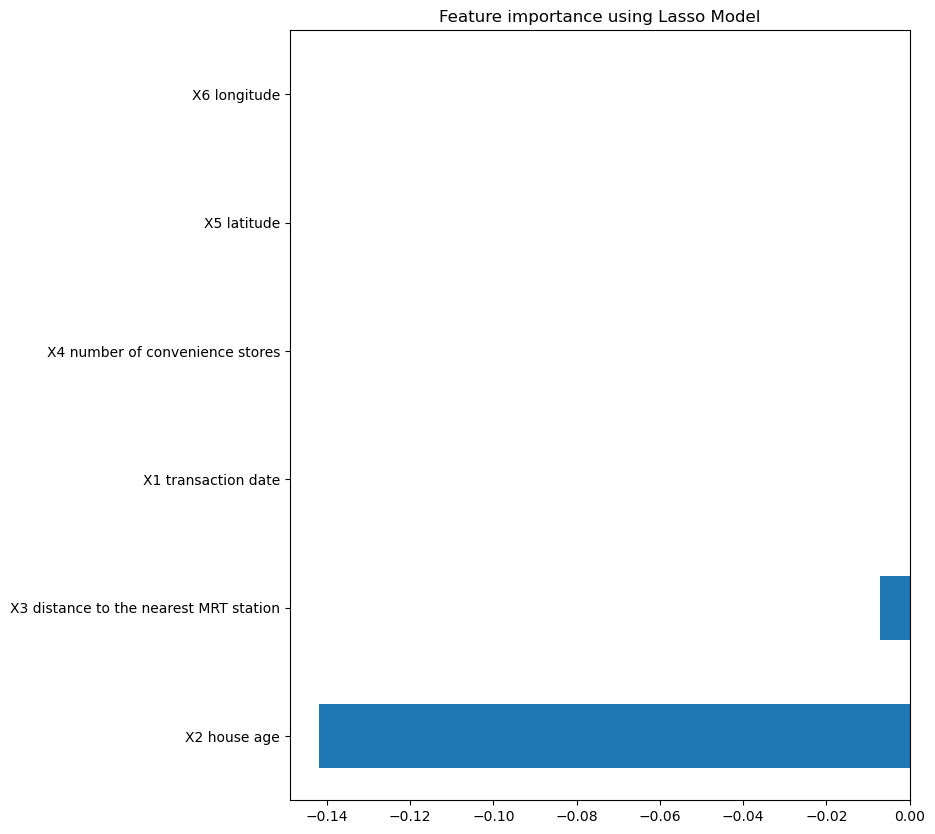

In [55]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(x,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef=pd.Series(reg.coef_, index=x.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0))+" variables and eliminated the other " + str(sum(coef == 0)) + " variables")

#the plot figure below shows which features are selected
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Exercise 5: Feature Selection
1.	Download breast cancer data set from this link: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
[Hints: you can refer to lab 6 to use a ready data set by impute the missing data with median]
2.	Perform feature selection as below: 

a.	applies a forward selection by using linear regression, set k_features = 4. Record the selected features. \
b.	applies a filter method by using correlation. Select features with correlation > 0.5. Record the selected features.\
c.	applies an embedded method by using Lasso Regression. Record the selected features.
